In [1]:
!pip install prophet

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.6 kB ? eta -:--:--
     --------------------------- ---------- 41.0/57.6 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 378.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB 2.0 MB/s eta 0:00:07
   ---------------------------------------- 0.0/13.3 MB 2.0 MB/s eta 0:00:07
   ---------------------------------------- 0.0/13.3 MB 2.0 MB/s eta 0:00:07
   ---------------------------------------- 0.1/13.3 MB 714.4 kB/s eta 0:00:19
   ---------------------------------------- 0.1/13.3 MB 714.4 kB/s eta 0:00:19
   ---------------------------------------- 0.1/13.3 MB 714.4 kB/s eta 0:00:19
   ---------------------------------------- 0.1/13.3 MB 714.4 kB/s eta 0:00:19
    --------------------------------------- 0.2/13.3 MB 628.1 kB/s eta 0:00:21

In [2]:
!pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.0/3.0 MB 991.0 kB/s eta 0:00:03
     - -------------------------------------- 0.1/3.0 MB 1.1 MB/s eta 0:00:03
     - -------------------------------------- 0.1/3.0 MB 1.2 MB/s eta 0:00:03
     --- ------------------------------------ 0.3/3.0 MB 1.4 MB/s eta 0:00:02
     ----- ---------------------------------- 0.4/3.0 MB 1.6 MB/s eta 0:00:02
     ------ --------------------------------- 0.5/3.0 MB 1.8 MB/s eta 0:00:02
     --------- ------------------------------ 0.7/3.0 MB 1.9 MB/s eta 0:00:02
     ---------- ----------------------------- 0.8/3.0 MB 2.0 MB/s eta 0:00:02
     ------------ --------------------------- 0.9/3.0 MB 2.1 MB/s eta 0:00:01
     -------------- ------------------------- 1.0/3.0 MB 2.2 MB/s eta 0:00:01
     ---------------- ----------------------- 1.2/3.0 MB 2.2 MB/s eta 0:00:01
     ------------------ --------------------- 1.4/3.0 MB 2.4 MB/s eta

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
from prophet import Prophet
import plotly.graph_objs as go

In [4]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import add_changepoints_to_plot, plot_cross_validation_metric

In [99]:
data = yf.download(tickers='HDFCBANK.NS', start='2019-01-01', end='2024-06-01', interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [100]:
data.reset_index(inplace=True)

In [101]:
data.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,1063.824951,1075.500,1052.800049,1074.050049,1022.420715,3186720
1,2019-01-02,1071.400024,1073.750,1059.849976,1064.250000,1013.091919,4067116
2,2019-01-03,1062.099976,1064.125,1051.500000,1055.900024,1005.143188,6385832


In [102]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [103]:
df = data[['Date','Close']]
df.rename(columns={'Date':'ds','Close':'y'}, inplace=True)
df.head()

C:\Users\YashRSinghRawat\AppData\Local\Temp\ipykernel_16544\4050821107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date':'ds','Close':'y'}, inplace=True)


,ds,y
0,2019-01-01,1074.050049
1,2019-01-02,1064.250000
2,2019-01-03,1055.900024
3,2019-01-04,1058.724976
4,2019-01-07,1060.324951


In [104]:
df.shape

(1336, 2)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1336 non-null   datetime64[ns]
 1   y       1336 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 21.0 KB


In [106]:
df.shape[0]*80//100

1068

In [107]:
df_train = df[:df.shape[0]*90//100]
df_test = df[df.shape[0]*90//100:]

In [108]:
print('df_train data : Min=',df_train.min()['ds'],' Max=',df_train.max()['ds'])
print('df_train data : Min=',df_test.min()['ds'],' Max=',df_test.max()['ds'])

df_train data : Min= 2019-01-01 00:00:00  Max= 2023-11-09 00:00:00
df_train data : Min= 2023-11-10 00:00:00  Max= 2024-05-31 00:00:00


In [109]:
m = Prophet(interval_width=0.95, n_changepoints=7)
m.fit(df_train)

18:57:33 - cmdstanpy - INFO - Chain [1] start processing
18:57:33 - cmdstanpy - INFO - Chain [1] done processing


In [110]:
future = m.make_future_dataframe(periods=df_test.shape[0])
forecast = m.predict(future)

In [111]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [112]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(df_test.shape[0])

,ds,yhat,yhat_lower,yhat_upper
1202,2023-11-10,1689.732406,1558.219994,1824.110082
1203,2023-11-11,1764.865120,1627.501560,1912.298983
1204,2023-11-12,1771.599964,1634.023332,1912.395534
1205,2023-11-13,1706.192068,1566.426447,1847.336626
1206,2023-11-14,1714.641503,1583.445500,1855.932811
...,...,...,...,...
1331,2024-03-18,1670.695231,1429.518347,1884.893695
1332,2024-03-19,1672.739112,1434.004596,1924.292914
1333,2024-03-20,1671.501289,1432.895569,1902.641019
1334,2024-03-21,1668.475652,1405.949460,1914.108810


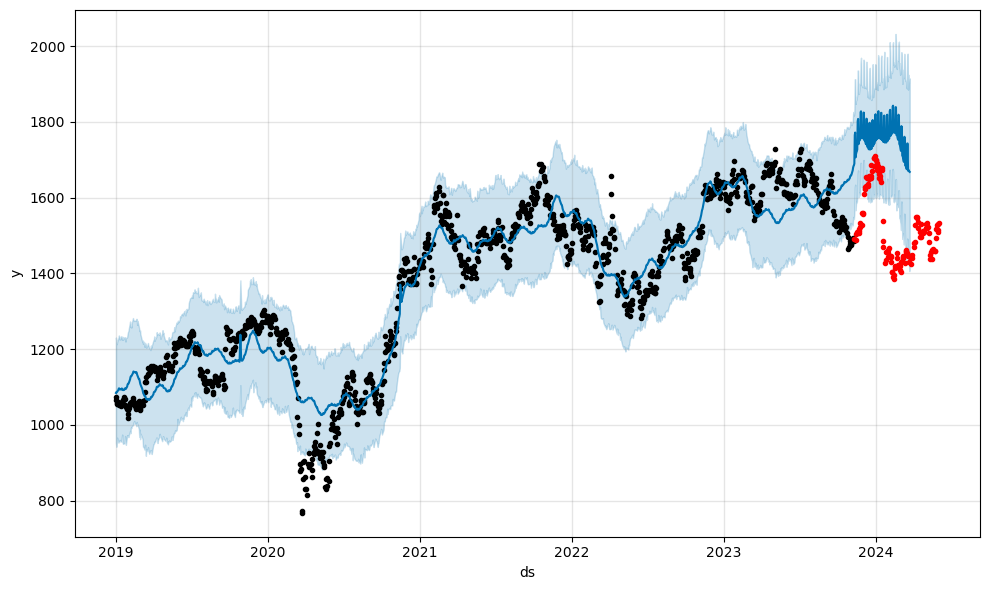

In [113]:
fig = m.plot(forecast)
ax = fig.gca()
ax.plot(df_test['ds'], df_test['y'], 'r.')

<Axes: xlabel='Date'>

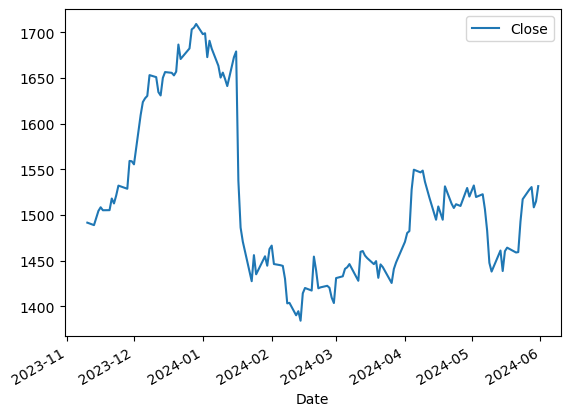

In [114]:
data.tail(df_test.shape[0])[['Date','Close']].set_index('Date').plot()

<Axes: xlabel='ds'>

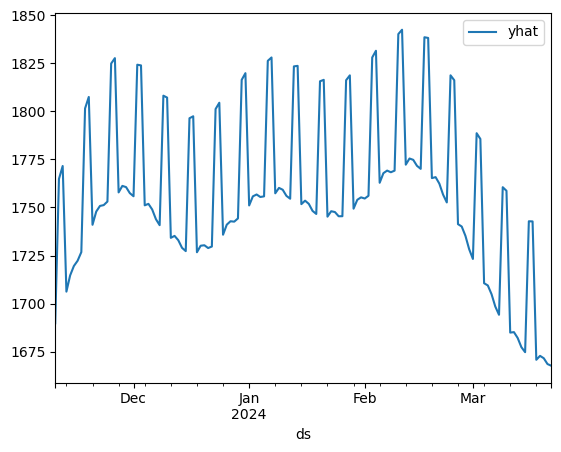

In [115]:
forecast[['ds', 'yhat']].tail(df_test.shape[0]).set_index('ds').plot()

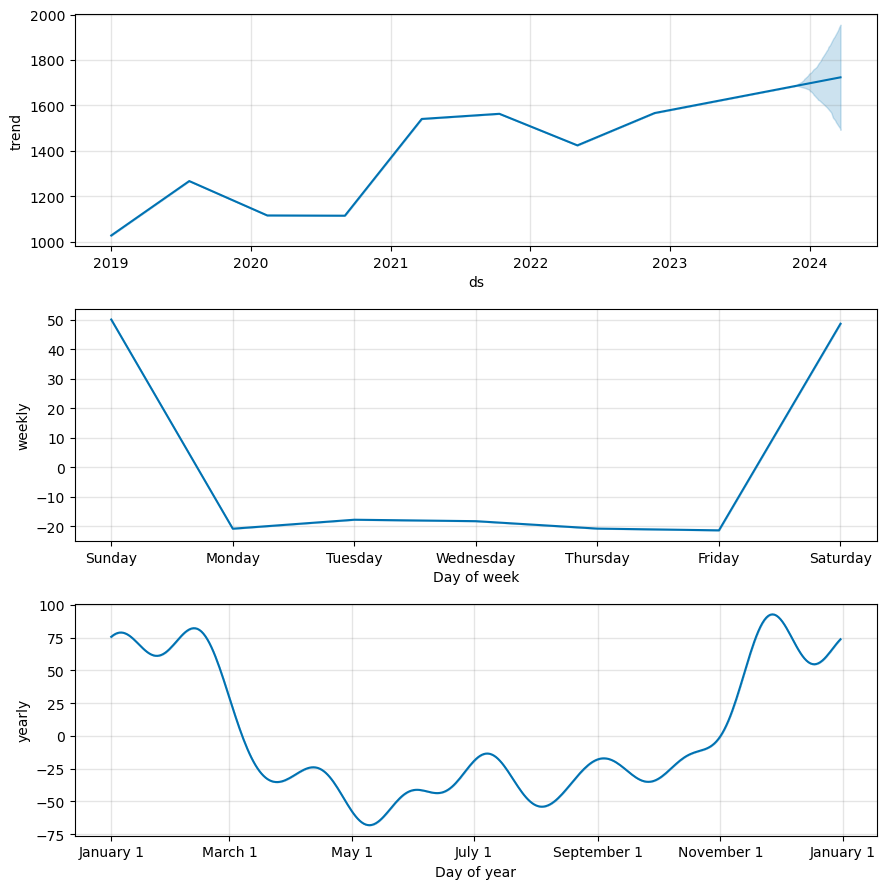

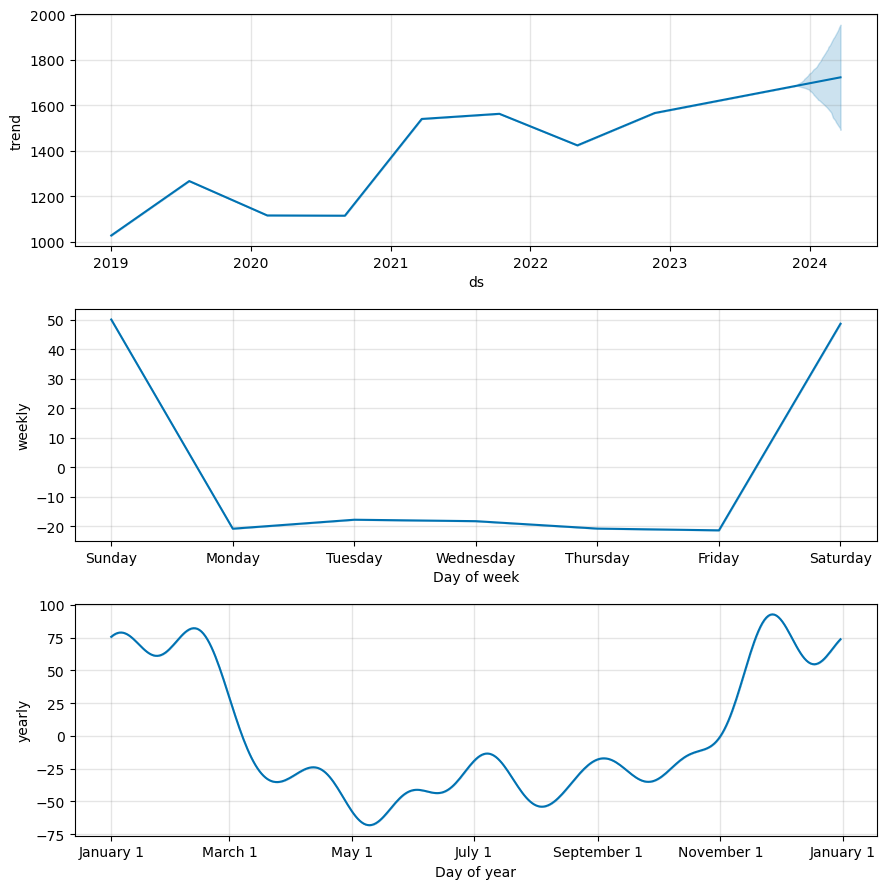

In [116]:
m.plot_components(forecast)

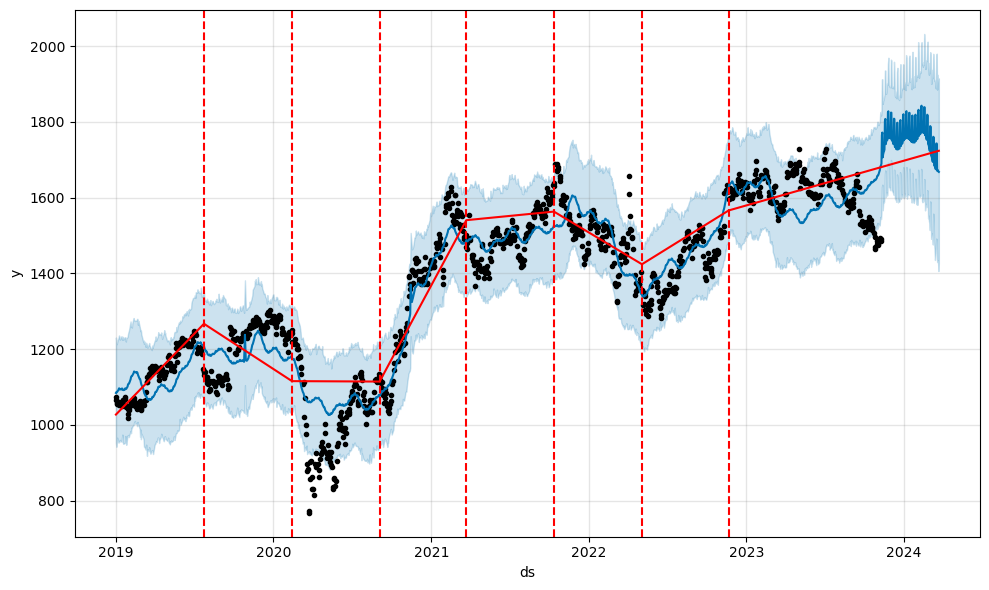

In [117]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)